# Imports

In [1]:
#Let's make sure we are using the right environment
import sys
print(sys.executable)

/home/arylwen/anaconda3/envs/fsdl_project/bin/python


In [2]:
#CHANGEME for package development
#import sys
#sys.path.append("/home/arylwen/github/fsdl_project_docker/semantic_search/semsearch_pkg")

#OR add to PYTHONPATH

#OR build the package
#! cd /home/arylwen/github/fsdl_project_docker/semantic_search
#! python3 setup.py install

In [3]:
#import sys
#sys.path

In [4]:
import glob
import os
from IPython.display import Image as IPImage
from PIL import Image
from IPython.display import display

In [5]:
#import sentence_transformers
import semsearch

In [6]:
from semsearch.retrieval import search

In [7]:
from semsearch.predict import make_predictions

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


/home/arylwen/anaconda3/envs/fsdl_project/lib/python3.7/site-packages/semsearch-0.1.0-py3.7.egg/semsearch /home/arylwen/anaconda3/envs/fsdl_project/lib/python3.7/site-packages/semsearch-0.1.0-py3.7.egg
Images: 5
Images: 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [8]:
from semsearch.encoding import clip_encoding

## Step-1 Get data

In [12]:
img_names = list(glob.glob('../data/photos/*.jpg'))
print("Images:", len(img_names))

Images: 1


## Step-2 Generate embeddings for lookup

In [13]:
embeddings = clip_encoding.get_image_embeddings(img_names[:20])
corpus = {"embeddings" :embeddings,"img_names":img_names[:20]}

Images: 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

## Step-3 Generate Query and its Embedding

In [14]:
query_text =  "Two dogs playing in the snow"
query_embed = clip_encoding.get_text_embeddings(query_text)
query = {"query_text":query_text,"query_embed":query_embed}

## Step-4 Seach using Cosine Simiarity

In [15]:
from semsearch.retrieval import search

In [16]:
hits = search.cosine_search(query,corpus,k=2)

In [17]:
hits

[{'corpus_id': 0, 'score': 0.12525300681591034}]

Query:


'Two dogs playing in the snow'

../data/photos/1E11Vqg_2hk.jpg


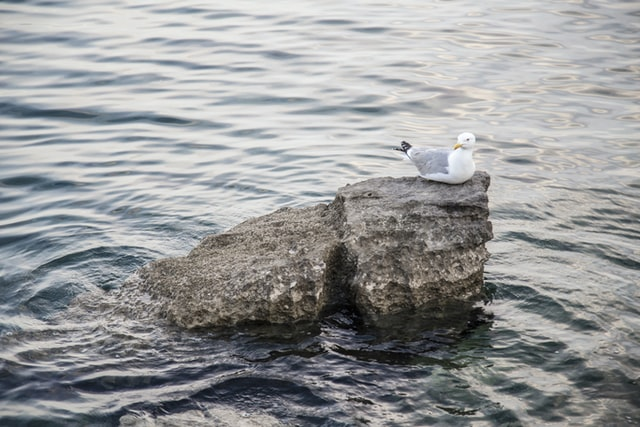

In [18]:
print("Query:")
display(query["query_text"])
for hit in hits[:1]:
    retrieved_img = corpus["img_names"][hit['corpus_id']]
    print(retrieved_img)
#     img = Image.open(retrieved_img)
#     img.show() 
    display(IPImage(os.path.join(".", img_names[hit['corpus_id']]), width=200))

## OR Direct call predict method

In [19]:
from semsearch.load import load_corpus,load_model
corpus = load_corpus()
model = load_model()

Images: 5
Images: 5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [20]:
from semsearch.predict import make_predictions
query_text =  "Two dogs playing in the snow"
hits = make_predictions(query_text)
hits

[{'corpus_id': 0, 'score': 0.2565647065639496},
 {'corpus_id': 1, 'score': 0.1978294551372528},
 {'corpus_id': 3, 'score': 0.13795632123947144}]

# API call

Ensure server is up and running
!python3 ../semantic_search/ml_api/run.py

In [ ]:
!curl -X 'POST' \
  'http://localhost:5000/v1/predictions' \
  -H 'accept: */*' \
  -H 'Content-Type: application/json' \
  -d '"Two dogs playing in the snow"'